# Linear models

### Linear models for regression

For regression, the general prediction formula for a linear model looks as follows:

$$\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}...+\beta_{p}x_{p} + u$$

Here, $x_{i}$ denotes the features (its cardinality is p) of a single data point $i$. $\beta$ and $u$ are paremeters of the model that are learned. Finally, $\hat{y}$ is the prediction the model makes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

w[0]: 0.393906  b: -0.031804


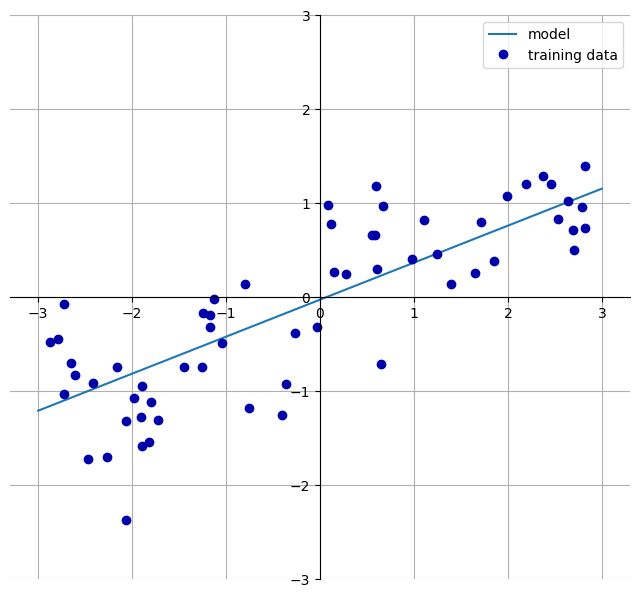

In [2]:
mglearn.plots.plot_linear_regression_wave()

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters $\beta$ and minimize the mean squared error

In [4]:
import mglearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples= 60)

In [13]:
print(f'X matrix: \n {X[:5]}')
print(f'y vector: \n {y[:5]}')

X matrix: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
y vector: 
 [-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.

In [4]:
print (f"lr.coef_: {lr.coef_[0]}")
print (f"lr.intercept_: {lr.intercept_}")

lr.coef_: 0.39390555116733955
lr.intercept_: -0.031804343026759746


In [5]:
print(f'Training set score: {lr.score(X_train,y_train)}') # R^2
print(f'Test set score: {lr.score(X_test, y_test)}')

Training set score: 0.6700890315075756
Test set score: 0.65933685968637


### Boston Housing dataset

In [6]:
X , y = mglearn.datasets.load_extended_boston ()

In [7]:
X_train , X_test , y_train , y_test = train_test_split (X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [8]:
print(f'Training set score: {lr.score(X_train,y_train)}') # R^2
print(f'Test set score: {lr.score(X_test, y_test)}')

Training set score: 0.9520519609032728
Test set score: 0.6074721959665891


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to con‐
trol complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression , which we will look into next.

### Ridge regression

In ridge regression, the coefficients $\beta$ are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of $w$ should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization .

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train)}')
print(f'Test set score: {ridge.score(X_test, y_test)}')

Training set score: 0.885796658517094
Test set score: 0.7527683481744747


With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. 

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0 .

In [10]:
ridge10 = Ridge (alpha=10).fit(X_train,y_train )
print(f'Training set score: {ridge10.score(X_train, y_train)}')
print(f'Test set score: {ridge10.score(X_test, y_test)}')

Training set score: 0.7882787115369614
Test set score: 0.6359411489177309


In [11]:
ridge01 = Ridge ( alpha=0.1 ) . fit ( X_train , y_train )
print ( "Training set score: {:.2f}" . format ( ridge01 . score ( X_train , y_train )))
print ( "Test set score: {:.2f}" . format ( ridge01 . score ( X_test , y_test )))

Training set score: 0.93
Test set score: 0.77


### Lasso

An alternative to Ridge for regularizing linear regression is Lasso . As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization. 8 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero . This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso () . fit ( X_train , y_train )
print ( "Training set score: {:.2f}" . format ( lasso . score ( X_train , y_train )))
print ( "Test set score: {:.2f}" . format ( lasso . score ( X_test , y_test )))
print ( "Number of features used: {}" . format ( np . sum ( lasso . coef_ != 0 )))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


### Linear modesl for classification

Linear models are also extensively used for classification. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:

$$\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}...+\beta_{p}x_{p} + u > 0$$

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classification.

The two most common linear classification algorithms are logistic regression , implemented in linear_model.LogisticRegression , and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


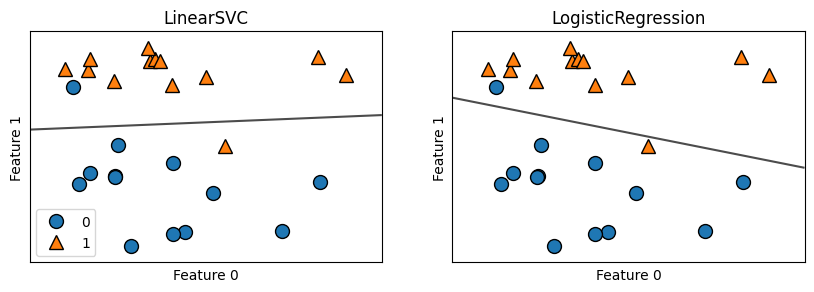

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X , y = mglearn . datasets . make_forge ()

fig , axes = plt . subplots ( 1 , 2 , figsize= ( 10 , 3 ))
for model , ax in zip ([ LinearSVC (), LogisticRegression ()], axes ):
    clf = model . fit ( X , y )
    mglearn . plots . plot_2d_separator ( clf , X , fill=False , eps=0.5 ,
    ax=ax , alpha= .7 )
    mglearn . discrete_scatter ( X [:, 0 ], X [:, 1 ], y , ax=ax )
    ax . set_title ( "{}" . format ( clf . __class__ . __name__ ))
    ax . set_xlabel ( "Feature 0" )
    ax . set_ylabel ( "Feature 1" )
axes [ 0 ] . legend ()

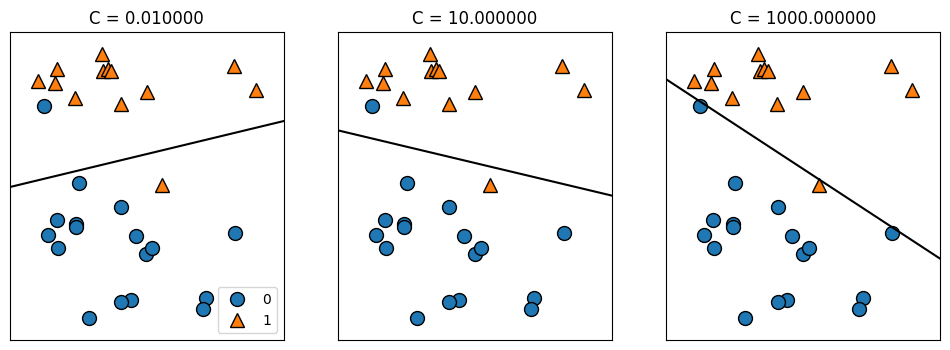

In [14]:
mglearn.plots.plot_linear_svc_regularization ()